In [26]:
# %pylab

import numpy
import matplotlib
from matplotlib import pylab, mlab, pyplot
from mpl_toolkits.mplot3d import Axes3D
np = numpy
plt = pyplot

from pylab import *
from numpy import *

from matplotlib import gridspec
matplotlib.rcParams.update({'font.size': 25})

In [27]:
from scipy.optimize import curve_fit
matplotlib.rcParams.update({'font.size': 25})

In [3]:
data = load('Temperature_DC05V_RF64V.npz')
time = data['time']
Temp = data['temperature']
i = argmin(abs(time-0.002))

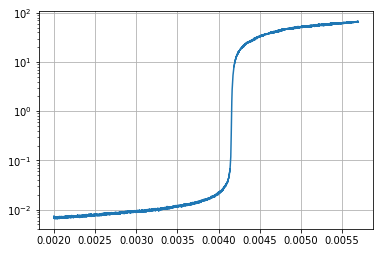

In [4]:
figure(1); clf();
semilogy(time[i:], Temp[i:])
grid()

In [5]:
x0 = (time[i:]-time[i])*1e3
y0 = log10(Temp[i:])
imax = argmax(diff(y0))

In [36]:
def func(x0, A, B, C, D, t0):
    return A*(x0-t0) / (C+(x0-t0)**2)**(D) + B

t0 = x0[imax]
A  = 1
B  = 0
C  = 1
D  = 1
E  = 2.5
G  = 0.5
p0 = array([A, B, C, D, t0])
popt, pcov = curve_fit(func, x0, y0, p0)
y1 = func(x0,popt[0], popt[1], popt[2], popt[3], popt[4])
Temp_fit = 10**(y1)

/home/adrian/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in power
  


In [37]:
popt

array([ 1.87062121e+00, -1.39944640e-01,  2.22827424e-04,  4.44243852e-01,
        2.15749263e+00])

In [31]:
popt

array([ 1.45664092e+00, -1.39944621e-01,  5.69460218e-01,  1.26893751e-04,
        2.15749267e+00,  2.25101566e+00])

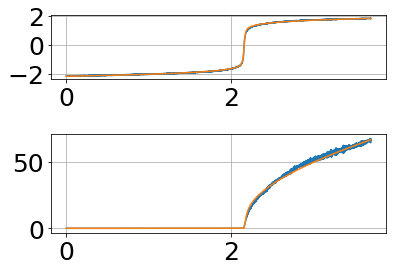

In [38]:
figure(2); clf();
subplot(311)
plot(x0,y0)
plot(x0,y1,label='x/(1+x^2)')
grid()

subplot(212)
plot(x0,Temp[i:])
plot(x0,Temp_fit,label='x/(1+x^2)')
grid()


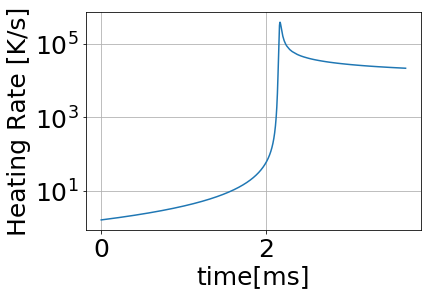

In [39]:
dt = (x0[1] - x0[0])*1e-3 # Because I had put x0 in ms
heating_rate = diff(Temp_fit) / dt

figure(2); clf();
semilogy(x0[:-1],heating_rate,label='x/(1+x^2)')
xlabel('time[ms]')
ylabel('Heating Rate [K/s]')
grid()


Text(0,0.5,'Heating Rate [K/s]')

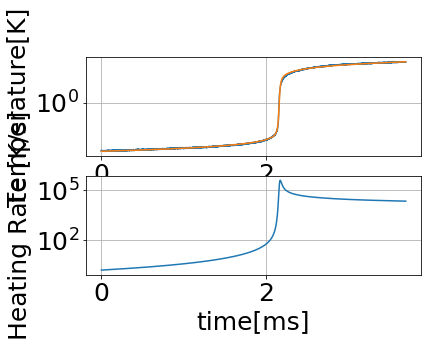

In [40]:
figure(2); clf();
subplot(211)
semilogy(x0,Temp[i:], label='Data')
semilogy(x0,Temp_fit , label='Fit')
grid()
xlabel('time[ms]')
ylabel('Temperature[K]')

subplot(212)
semilogy(x0[:-1],heating_rate,label='x/(1+x^2)')
grid()
xlabel('time[ms]')
ylabel('Heating Rate [K/s]')


In [41]:
C_e = 1.602e-19        # Coulomb
kb = 1.38064852*1e-23  # Boltzman
eps0 = 8.854187*1e-12
# gamma plasma
L = 93.6*1e-6
R = 469.2/2*1e-3
V = 4/3*pi*R**2*L
n0 = 1024/(V)
aws = ( 3/(4*pi*n0) )**(1/3)
gamma_plasma = C_e**2/(4*pi*eps0*kb*aws*Temp[i:])

In [54]:
Temp[index_t0],x0[index_t0],t0

(0.007060720314499329, 2.153499999907706, 2.153499999907706)

In [59]:
len(x0),len(Temp)

(7392, 11391)

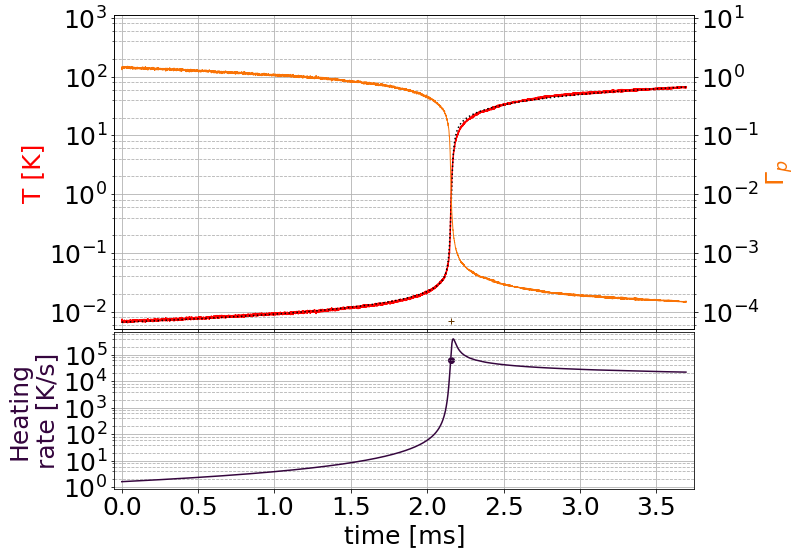

In [58]:
# Plot temperature Langevin + md laser  ALL SimuType   ALL TEMP SEPARATED

figname = 'T_and_DE'
fig1 = plt.figure(num=figname,clear='True')
fig1.set_size_inches(11.69,8.27)
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) 
# the fisrt subplot
ax1 = plt.subplot(gs[0])

ax1.semilogy(x0,Temp[i:], label='T',color='red')
ax1.semilogy(x0,Temp_fit, label='fit T',color='k',ls=':')
ax1.grid()
ax1.set_ylabel('T [K]',color='red')

index_t0 = list(x0[:-1]).index(t0)
ax1.plot(t0,Temp[index_t0], marker='+',color='xkcd:brown')


axins1=ax1.twinx()
# make a plot with different y-axis using second axis object
axins1.semilogy(x0,gamma_plasma, label=r'$\Gamma_p$',color='xkcd:orange',lw=1,ls='-',zorder=2)
axins1.set_ylabel(r"$\Gamma_p$",color='xkcd:orange')
locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
axins1.yaxis.set_major_locator(locmaj)
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
axins1.yaxis.set_minor_locator(locmin)

ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=0.5))
ax1.grid(b=True, which='major', linestyle='-')
ax1.grid(b=True, which='minor', linestyle='--')
plt.setp(ax1.get_xticklabels(),visible=False)

y1 = 5e-3
y2 = 1.1e3
ax1.set_ylim(y1, y2)
axins1.set_ylim(y1/100, y2/100)

# ax2 = subplot(212,sharex=ax1)
ax2 = plt.subplot(gs[1], sharex = ax1)
ax2.semilogy(x0[:-1],heating_rate, label='H',color='xkcd:dark purple')

ax2.scatter(t0,heating_rate[index_t0], label='H',color='xkcd:dark purple')
ax2.grid()

ax2.set_xlabel('time [ms]')
ax2.set_ylabel('Heating\nrate [K/s]',color='xkcd:dark purple')

locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
ax1.yaxis.set_major_locator(locmaj)

axins1.yaxis.set_major_locator(locmaj)
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax1.yaxis.set_minor_locator(locmin)
ax1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
axins1.yaxis.set_minor_locator(locmin)
axins1.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

locmaj = matplotlib.ticker.LogLocator(base=10,numticks=12) 
locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(0.2,0.4,0.6,0.8),numticks=12)
ax2.yaxis.set_minor_locator(locmin)
ax2.yaxis.set_major_locator(locmaj)
ax2.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())


ax2.grid(b=True, which='major', linestyle='-')
ax2.grid(b=True, which='minor', linestyle='--')

ax1.set_xlim(-0.05, 3.75)
# ax1.set_ylim(0.0001, 1200)

plt.tight_layout()
subplots_adjust(hspace=0.01)
# savefig(fname = figname+'_'+re.sub('/','_',dirname_hc[31:-1])+'.png',dpi=300)
# savefig(fname+'_D'+str(Detuning)+'_50eV'+'.png',dpi=300)
# savefig('Heating_Rate_from_Fit.png',dpi=600)

In [63]:
savefig('Heating_Rate_from_Fit.png',dpi=600)

<Figure size 432x288 with 0 Axes>

AttributeError: Unknown property ls

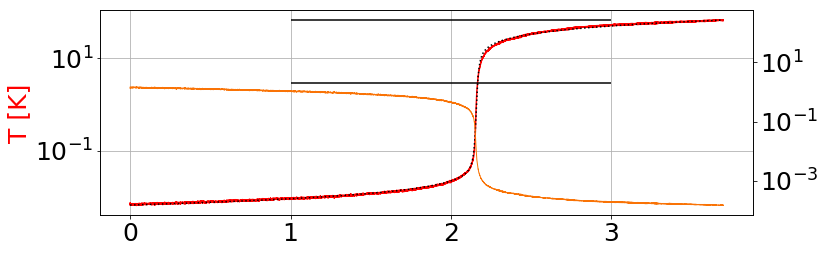

In [25]:
# Plot temperature Langevin + md laser  ALL SimuType   ALL TEMP SEPARATED

figname = 'T_and_DE'
fig1 = plt.figure(num=figname,clear='True')
fig1.set_size_inches(11.69,8.27)
# set height ratios for sublots
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1]) 
# the fisrt subplot
ax1 = plt.subplot(gs[0])

ax1.semilogy(x0,Temp[i:], label='T',color='red')
ax1.semilogy(x0,Temp_fit, label='fit T',color='k',ls=':')
ax1.grid()
ax1.set_ylabel('T [K]',color='red')


axins1=ax1.twinx()
# make a plot with different y-axis using second axis object
axins1.semilogy(x0,gamma_plasma, label=r'$\Gamma_p$',color='xkcd:orange',lw=1,ls='-',zorder=2)
axins1.hlines(278,1,3,ls=':')
axins1.hlines(2,1,3,ls=':')
axins1.set_ylabel(r"$\Gamma_p$",color='xkcd:orange')

ax1.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=0.01))
ax1.grid(b=True, which='major', linestyle='-')
ax1.grid(b=True, which='minor', linestyle='--')
plt.setp(ax1.get_xticklabels(),visible=False)

y1 = 5e-3
y2 = 1.1e3
ax1.set_ylim(y1, y2)
axins1.set_ylim(y1/100, y2/100)

# ax2 = subplot(212,sharex=ax1)
ax2 = plt.subplot(gs[1], sharex = ax1)
ax2.semilogy(x0[:-1],heating_rate, label='H',color='xkcd:dark purple')

ax2.grid()

ax2.set_xlabel('time [ms]')
ax2.set_ylabel('Heating rate [K/s]',color='xkcd:dark purple')

ax2.grid(b=True, which='major', linestyle='-')
ax2.grid(b=True, which='minor', linestyle='--')

ax2.tick_params(axis='x', labelrotation=45,labelsize=10)

ax1.set_xlim(2, 2.25)
# ax1.set_ylim(0.0001, 1200)

plt.tight_layout()
subplots_adjust(hspace=0.01)
# savefig(fname = figname+'_'+re.sub('/','_',dirname_hc[31:-1])+'.png',dpi=300)
# savefig(fname+'_D'+str(Detuning)+'_50eV'+'.png',dpi=300)
# savefig('Heating_Rate_from_Fit.png',dpi=600)

In [127]:
data = load('All_stat_DC05_RF10_50eV.npz')
tt = data['time']
Temp_simu = data['Temperature']

tt = hstack((tt[28,:14850],tt[28,14851:]))
Temp_simu = hstack((mean(Temp_simu[28,:],axis=1)[:14850], mean(Temp_simu[28,:],axis=1)[14851:]))

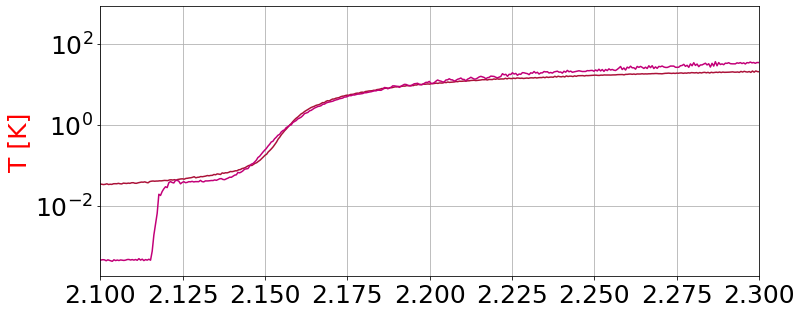

In [128]:
# Plot temperature Langevin + md laser  ALL SimuType   ALL TEMP SEPARATED

figname = 'T_and_DE'
fig1 = plt.figure(num=figname,clear='True')
fig1.set_size_inches(11.69,8.27)
# set height ratios for sublots
# the fisrt subplot
ax1 = plt.subplot(gs[0])

ax1.semilogy(x0,Temp[i:], label='T',color='xkcd:rouge')

time_offset = -5.397
ax1.semilogy(tt*1e3+time_offset,Temp_simu, label='T',color='xkcd:magenta')
ax1.grid()
ax1.set_ylabel('T [K]',color='red')

ax1.set_xlim(2.1, 2.3)
# ax1.set_ylim(0.0001, 1200)

plt.tight_layout()
subplots_adjust(hspace=0.01)
# savefig(fname = figname+'_'+re.sub('/','_',dirname_hc[31:-1])+'.png',dpi=300)
# savefig(fname+'_D'+str(Detuning)+'_50eV'+'.png',dpi=300)
# savefig('Heating_Rate_from_Fit.png',dpi=600)